In [213]:
pwd

'C:\\Users\\Sukamal\\Desktop\\Machine Learning\\my practice\\Titanic Machine Learning from Disaster'

### Introduction 
It is one of my 1st project in machine learning. I am experienced in software development but machine learning is part of my interest. I heard that titanic is one of the most popular project to start machine learning. Thank you kaggle for giving us such an opportunity to find all things together.

### Plan
1. First of all I will import some libraries
2. I will load the data given by kaggle
3. I will visualize the data in different ways
4. I will think for my next plan

### importing library
These are the most common libraries I learnt for machine learning. For now I am importing these libraries. If required I will import some more libraries in future.

In [1]:
import pandas as pd # used for dataset
import numpy as np # used for mathematical calculations
import matplotlib.pyplot as plt # used for graphical representation

### reading dataset
I have loaded all the csv files with read_csv() method. train.csv is stored in train dataset. test.csv is stored in test dataset and gender_submission.csv is stored in test_sample dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_sample = pd.read_csv('gender_submission.csv')

### visualizing dataframe
Here I am trying to visualize the train, test and test_sample dataset.

In [3]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test_sample.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

In [8]:
test_sample.shape

(418, 2)

In [9]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

It looks good. We are clearly seeing some good things here like, Name, Sex, Ticket, Cabin and Embarked are having string values. Sex, Embarked are having categorical values. train dataset has passengerid upto 891 and test dataset started from passengerid 892. The test dataset has no column or variable named Survived. But test_sample dataset has the Survived column which is referred from the test dataset.
So lets merge test dataset with test_sample dataset dataset on column PassengerId
As Survived is our target column lets create x_test, x_train, y_test and y_train now.
### Merging test, test_sample

In [11]:
test = pd.merge(test, test_sample, on='PassengerId')

lets visualize the dataframe now

In [12]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


it looks train dataframe has Survived column at the index position 1 where as test dataframe has Survived column at last.
so lets make both the dataframes similar

In [13]:
cols = train.columns.tolist() # getting the column names as a list of strings

In [14]:
cols

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [15]:
cols = cols[0:1] + cols[2:] + cols[1:2] # rearranging the list 

In [16]:
cols

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Survived']

In [17]:
train = train[cols] # rearranging the dataframe

In [18]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [19]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


So for now we have created our train and test dataframes. Now lets move forward and remove unwanted columns. But before that I want to concat train and test datafrme together, so that I can analyze all data at a time. But doing that can consume more memory. So, its important to know the memory occupied by our data frames. Lets check..

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Survived       891 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Survived       418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


As we can see that the memory occupied by those dataframes are very less(in KB). So I am going to concat those dataframes together and create a new copy of dataframe with all data together

In [22]:
frames = [train,test]

In [23]:
df = pd.concat(frames, ignore_index=True)

In [24]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Survived       1309 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


So, now lets move forward to find the best independent variables 

### Narrowing down our columns

Checking the shape of the datafrme

In [26]:
df.shape

(1309, 12)

Checking the column names

In [27]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [28]:
cols

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Survived']

Lets look at the values of the individual columns

In [29]:
df.PassengerId.unique()

array([   1,    2,    3, ..., 1307, 1308, 1309], dtype=int64)

PassengerId is a randomly generated field for identification only. So I am removing it.

In [30]:
cols = cols[1:]

In [31]:
df = df[cols]

In [32]:
train = train[cols]

In [33]:
test = test[cols]

Lets check now how our train and test set looks

In [34]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [35]:
train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [36]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


Lets check Pclass column now

In [37]:
df.Pclass.unique() 

array([3, 1, 2], dtype=int64)

In [38]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

It seems it is a categorical column which represents passenger's class. So, lets check now how it is related with our dependent variable

In [39]:
pc = df.groupby(['Pclass','Survived'])['Survived'].count() # finding groupwise survival count of the people 

In [40]:
pc
# before unstacking the data

Pclass  Survived
1       0           137
        1           186
2       0           160
        1           117
3       0           518
        1           191
Name: Survived, dtype: int64

In [41]:
pc = pc.unstack('Survived')
# unstacking the data

In [42]:
pc
# after unstacking the data

Survived,0,1
Pclass,,
1,137,186
2,160,117
3,518,191


 here we can see, 
 Pclass 1 - 80 people died and 136 survived
 Pclass 2 - 97 died and 87 survived
 Pclass 3 - 372 people died and 119 survived
 It is clearly showing Pclass has a direct impact on survival. The lower class is the more people died. So we will keep this column.
 Lets check it graphically

Text(0.5,1,'Class wise survival and death count')

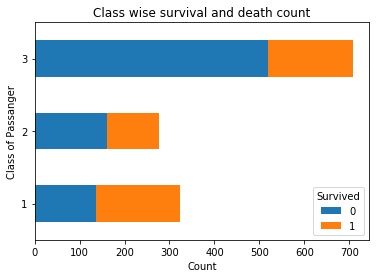

In [43]:
p1 = pc.plot.barh(stacked=True)
p1.set_xlabel('Count')
p1.set_ylabel('Class of Passanger')
p1.set_title('Class wise survival and death count')

Now lets move forware and check Name column

In [44]:
train.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

From general idea I am considering to remove this column. Moreover it requires other data and a lot of processing to become potentially useful.

In [45]:
cols = cols[0:1]+cols[2:]

In [46]:
df = df[cols]

In [47]:
train = train[cols]

In [48]:
test = test[cols]

Now lets look at our dataframes and columns once again

In [49]:
df.tail()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
1304,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
1305,1,female,39.0,0,0,PC 17758,108.9000,C105,C,1
1306,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
1307,3,male,NaN,0,0,359309,8.0500,NaN,S,0
1308,3,male,NaN,1,1,2668,22.3583,NaN,C,0


In [50]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [51]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,3,female,47.0,1,0,363272,7.0000,NaN,S,1
2,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,3,female,22.0,1,1,3101298,12.2875,NaN,S,1


In [52]:
cols

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Survived']

Now lets check Sex column

In [53]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

So.. Categorical column again.. lets find its impact on survival. For that I am going to count total male and female survived as well as died

In [54]:
male_survival_count = [df[(df['Sex']=='male') & (df['Survived']==1)]['Survived'].count(),
                       df[(df['Sex']=='male') & (df['Survived']==0)]['Survived'].count()]
# using conditions I am retrieving count of survived male and died male

In [55]:
female_survival_count = [df[(df['Sex']=='female') & (df['Survived']==1)]['Survived'].count(),
                      df[(df['Sex']=='female') & (df['Survived']==0)]['Survived'].count()]
# using conditions I am retrieving count of survived female and died female

In [56]:
male_survival_count  
# here the 1st number represents total male survived and 2nd number represents total male died

[109, 734]

In [57]:
female_survival_count 
# same here but for female, the 1st number represents total female survived and 2nd number represents total female died

[385, 81]

In [58]:
len(df.index)

1309

we can see more males died compared to females. I am going to keep this column. Lets see the graphical representation

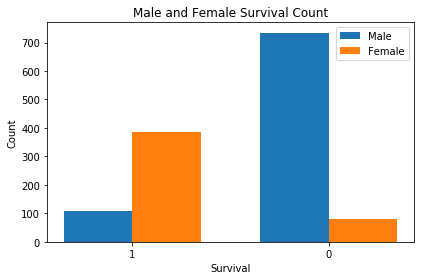

In [59]:
fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.35
react1 = ax.bar(index,male_survival_count,bar_width,label='Male')
react2 = ax.bar(index+bar_width,female_survival_count,bar_width,label='Female')
ax.set_xlabel('Survival')
ax.set_ylabel('Count')
ax.set_title('Male and Female Survival Count')
ax.set_xticks(index+bar_width/2)
ax.set_xticklabels(('1','0'))
ax.legend()
fig.tight_layout()
plt.show()

Ok.. Now moving forward to Name Age column

In [60]:
df.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  , 22.5 ,
       18.5 , 67.  , 76.  , 26.5 , 60.5 , 11.5 ,  0.33,  0.17, 38.5 ])

Lets check the relation between Age and survival of a person. For that I will be creating age groups and then I will count number of people survived or died for each group.
Age groups - children(00-14 years), youth(15-24 years), adults(25-64 years) and seniors(65 years and over) survival

In [61]:
died = [df[(df['Age']<15) & (df['Survived']==0)]['Survived'].count(),
 df[(df['Age'].between(15,24,inclusive=True)) & (df['Survived']==0)]['Survived'].count(),
 df[(df['Age'].between(25,64,inclusive=True)) & (df['Survived']==0)]['Survived'].count(),
 df[(df['Age']>65) & (df['Survived']==0)]['Survived'].count()]
#Here I have selected people different age groups with normal condition and then counted how many of them died with count() method  

In [62]:
survived = [df[(df['Age']<15) & (df['Survived']==1)]['Survived'].count(),
 df[(df['Age'].between(15,24,inclusive=True)) & (df['Survived']==1)]['Survived'].count(),
 df[(df['Age'].between(25,64,inclusive=True)) & (df['Survived']==1)]['Survived'].count(),
 df[(df['Age']>65) & (df['Survived']==1)]['Survived'].count()]
# same using count() methos I have counted number of people survived in different age groups

In [63]:
survived = [round((x*100)/sum(survived),2) for x in survived]

In [64]:
died = [round((x*100)/sum(died),2) for x in died]

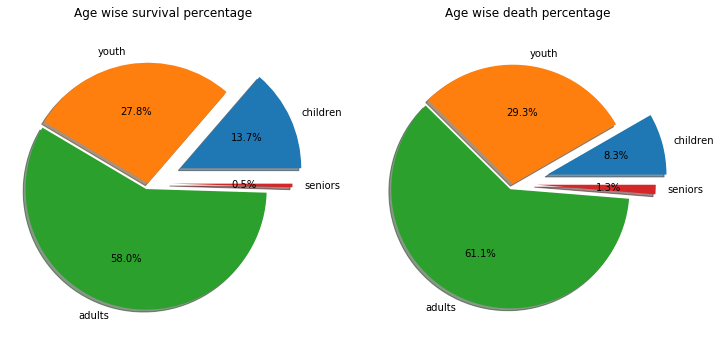

In [65]:
labels = 'children', 'youth', 'adults', 'seniors'
explode = (0.3,0,0.05,0.2)
fig1, ax1 = plt.subplots(ncols=2)
fig1.set_size_inches(12,6)
ax1[0].pie(survived,explode=explode,labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)
ax1[1].pie(died,explode=explode,labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)
ax1[0].axis('equal')
ax1[0].set_title('Age wise survival percentage')
ax1[1].axis('equal')
ax1[1].set_title('Age wise death percentage')
plt.show()

we can see, for childrens survival ration is more. But unfortunately for others death ration is more. I am going to keep this column as Age is impacting survival ratio of a person.

In [66]:
df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [67]:
df.SibSp.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [68]:
df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6, 9], dtype=int64)

In [69]:
df.Parch.value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

In [70]:
cols = cols + ['Total_Family_Members']

In [71]:
df['Total_Family_Members'] = df['SibSp'] + df['Parch'] + 1 
train['Total_Family_Members'] = train['SibSp'] + train['Parch'] + 1
test['Total_Family_Members'] = test['SibSp'] + test['Parch'] + 1
# Creating Total_Family_Members colums by adding SibSp, Parch and the person himself/herself

In [72]:
print(cols)

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived', 'Total_Family_Members']


In [73]:
cols = cols[0:3]+cols[-1:]+cols[5:-1]

In [74]:
print(cols)

['Pclass', 'Sex', 'Age', 'Total_Family_Members', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']


In [75]:
df = df[cols]
train = train[cols]
test = test[cols]

In [76]:
df.tail()

,Pclass,Sex,Age,Total_Family_Members,Ticket,Fare,Cabin,Embarked,Survived
1304,3,male,NaN,1,A.5. 3236,8.0500,NaN,S,0
1305,1,female,39.0,1,PC 17758,108.9000,C105,C,1
1306,3,male,38.5,1,SOTON/O.Q. 3101262,7.2500,NaN,S,0
1307,3,male,NaN,1,359309,8.0500,NaN,S,0
1308,3,male,NaN,3,2668,22.3583,NaN,C,0


In [77]:
train.head()

,Pclass,Sex,Age,Total_Family_Members,Ticket,Fare,Cabin,Embarked,Survived
0,3,male,22.0,2,A/5 21171,7.2500,NaN,S,0
1,1,female,38.0,2,PC 17599,71.2833,C85,C,1
2,3,female,26.0,1,STON/O2. 3101282,7.9250,NaN,S,1
3,1,female,35.0,2,113803,53.1000,C123,S,1
4,3,male,35.0,1,373450,8.0500,NaN,S,0


In [78]:
test.head()

,Pclass,Sex,Age,Total_Family_Members,Ticket,Fare,Cabin,Embarked,Survived
0,3,male,34.5,1,330911,7.8292,NaN,Q,0
1,3,female,47.0,2,363272,7.0000,NaN,S,1
2,2,male,62.0,1,240276,9.6875,NaN,Q,0
3,3,male,27.0,1,315154,8.6625,NaN,S,0
4,3,female,22.0,3,3101298,12.2875,NaN,S,1


In [79]:
pc = df.groupby(['Total_Family_Members','Survived'])['Survived'].count()
# "Total_Family_Member" and "Survived" wise grouping the data then counting how many of them survived

In [80]:
pc = pc.unstack(['Survived'])
#unstacking the data

In [81]:
pc

Survived,0,1
Total_Family_Members,,
1,559,231
2,110,125
3,70,89
4,12,31
5,17,5
6,20,5
7,11,5
8,7,1
11,9,2


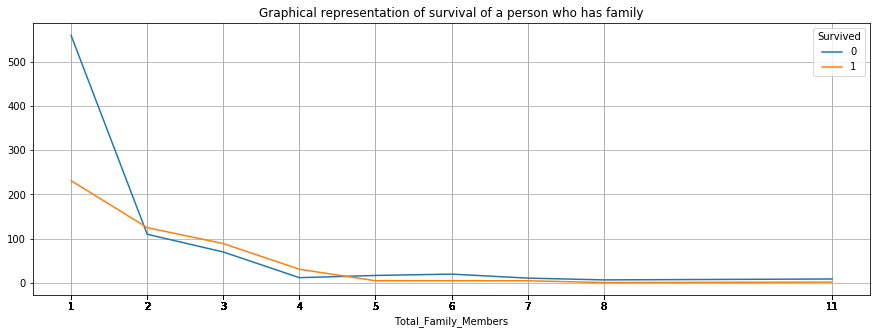

In [82]:
p1 = pc.plot(kind='line', xticks = df['Total_Family_Members'], figsize = (15,5), grid = True, 
             title = 'Graphical representation of survival of a person who has family')

In [83]:
df.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [84]:
len(df.Ticket.unique())

929

In [85]:
len(df)

1309

In [86]:
df.groupby(['Ticket'])['Ticket'].count()

Ticket
110152               3
110413               3
110465               2
110469               1
110489               1
110564               1
110813               2
111163               1
111240               1
111320               1
111361               2
111369               1
111426               1
111427               1
111428               1
112050               1
112051               1
112052               1
112053               1
112058               2
112059               1
112277               1
112377               1
112378               2
112379               1
112901               1
113028               1
113038               1
113043               1
113044               1
                    ..
STON/O 2. 3101273    1
STON/O 2. 3101274    1
STON/O 2. 3101275    1
STON/O 2. 3101280    1
STON/O 2. 3101285    1
STON/O 2. 3101286    1
STON/O 2. 3101288    1
STON/O 2. 3101289    1
STON/O 2. 3101291    1
STON/O 2. 3101292    1
STON/O 2. 3101293    1
STON/O 2. 3101294    1
STON

In [87]:
df[df['Ticket']=='110152']
#3 friends survived
# they are friends because all of them are having only 1 family member here

,Pclass,Sex,Age,Total_Family_Members,Ticket,Fare,Cabin,Embarked,Survived
257,1,female,30.0,1,110152,86.5,B77,S,1
504,1,female,16.0,1,110152,86.5,B79,S,1
759,1,female,33.0,1,110152,86.5,B77,S,1


In [88]:
df[df['Ticket']=='110413']

#Father died in this family
#I am guessing here that it is a family with 3 family members - father, mother and a female child. 
#they were travelling with 1 ticket. the male member died. It means may be the father died. 
#To know it better I need the name column also. As I have deleted name column earlier so I am not going 
#to bring it back here again. But it feels very sad as these details are comming up 

,Pclass,Sex,Age,Total_Family_Members,Ticket,Fare,Cabin,Embarked,Survived
262,1,male,52.0,3,110413,79.65,E67,S,0
558,1,female,39.0,3,110413,79.65,E67,S,1
585,1,female,18.0,3,110413,79.65,E68,S,1


In [89]:
df[df['Ticket']=='W./C. 6608']
#All 5 family members died in this family 112901

,Pclass,Sex,Age,Total_Family_Members,Ticket,Fare,Cabin,Embarked,Survived
86,3,male,16.0,5,W./C. 6608,34.375,NaN,S,0
147,3,female,9.0,5,W./C. 6608,34.375,NaN,S,0
436,3,female,21.0,5,W./C. 6608,34.375,NaN,S,0
736,3,female,48.0,5,W./C. 6608,34.375,NaN,S,0
1058,3,male,18.0,5,W./C. 6608,34.375,NaN,S,0


In [90]:
df[df['Ticket']=='112901']
#incomplete data. There are 3 family members in this family. but record for one family member is only available. 
#No data available for  other family members. 

,Pclass,Sex,Age,Total_Family_Members,Ticket,Fare,Cabin,Embarked,Survived
1196,1,female,64.0,3,112901,26.55,B26,S,1


In [91]:
df[df['Ticket']=='WE/P 5735']
#3rd family member detail not available

,Pclass,Sex,Age,Total_Family_Members,Ticket,Fare,Cabin,Embarked,Survived
540,1,female,36.0,3,WE/P 5735,71.0,B22,S,1
745,1,male,70.0,3,WE/P 5735,71.0,B22,S,0


In [92]:
pp = df.groupby(['Ticket','Total_Family_Members','Survived'])['Ticket'].count()
#lets check how many people survived or died from people who were travelling with one ticket 
#and total number of family members for each of them 

In [93]:
pp = pp.unstack(['Survived'],fill_value=0)

In [94]:
pp

,Survived,0,1
Ticket,Total_Family_Members,,
110152,1,0,3
110413,3,1,2
110465,1,2,0
110469,1,1,0
110489,1,1,0
110564,1,0,1
110813,2,1,1
111163,1,1,0
111240,1,1,0


In [95]:
#Removing the punctuation
import string

punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{}~'   # `|` is not present here
transtab = str.maketrans(dict.fromkeys(punctuation, ''))

df['Ticket'] = '|'.join(df['Ticket'].tolist()).translate(transtab).split('|')
train['Ticket'] = '|'.join(train['Ticket'].tolist()).translate(transtab).split('|')
test['Ticket'] = '|'.join(test['Ticket'].tolist()).translate(transtab).split('|')

In [96]:
df['Ticket'].unique()

array(['A5 21171', 'PC 17599', 'STONO2 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A5 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'CA 24579', 'PC 17604', '113789', '2677',
       'A5 2152', '345764', '2651', '7546', '11668', '349253',
       'SCParis 2123', '330958', 'SCA4 23567', '370371', '14311', '2662',
       '349237', '3101295', 'A4 39886', 'PC 17572', '2926', '113509',
       '19947', 'CA 31026', '2697', 'CA 34651', 'CA 2144', '2669',
       '113572', '36973', '347088', 'PC 17605', '2661', 'CA 29395',
       'SP 3464', '3101281', '315151', 'CA 33111', 'SOC 14879', '2680',
       '1601', '348123', '349208', '374746', '248738', '364516', '345767',
       '345779', '330932', '113059', 'SOC 14885', '3101278', 'WC 6608',
       'SOTONOQ 392086'

In [97]:
part_df = df['Ticket'].str.rpartition(' ')
part_train = train['Ticket'].str.rpartition(' ')
part_test = test['Ticket'].str.rpartition(' ')

In [98]:
part_df

,0,1,2
0,A5,,21171
1,PC,,17599
2,STONO2,,3101282
3,,,113803
4,,,373450
5,,,330877
6,,,17463
7,,,349909
8,,,347742
9,,,237736


In [99]:
part_df[1].unique()

array([' ', ''], dtype=object)

In [100]:
part_df.describe()

,0,1,2
count,1309,1309,1309
unique,37,2,924
top,,,2343
freq,961,961,11


In [101]:
part_df[0].unique()
#Finding categories in values.

array(['A5', 'PC', 'STONO2', '', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO 2', 'C', 'SCPARIS',
       'SOP', 'Fa', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH', 'AS',
       'SCAH Basle', 'SOPP', 'FC', 'SOTONO2', 'CASOTON', 'SCA3', 'STONOQ',
       'AQ4', 'A 2', 'LP', 'AQ3'], dtype=object)

In [102]:
len(part_df[0].unique())
#We can see to tal 37 different types of values are available there

37

In [103]:
part2_df = part_df[part_df[0]!='']
#Finding rows only with values in part_df[0]

In [104]:
part2_df

,0,1,2
0,A5,,21171
1,PC,,17599
2,STONO2,,3101282
10,PP,,9549
12,A5,,2151
30,PC,,17601
31,PC,,17569
33,CA,,24579
34,PC,,17604
37,A5,,2152


In [105]:
part2_df[0].count()
#counting total number of rows with values

348

In [106]:
labels = part_df[0].astype('category').unique().tolist()
categories = {0: {k: v for k,v in zip(labels,list(range(11,len(labels)+11)))}}

In [107]:
print(categories)

{0: {'A5': 11, 'PC': 12, 'STONO2': 13, '': 14, 'PP': 15, 'CA': 16, 'SCParis': 17, 'SCA4': 18, 'A4': 19, 'SP': 20, 'SOC': 21, 'WC': 22, 'SOTONOQ': 23, 'WEP': 24, 'STONO 2': 25, 'C': 26, 'SCPARIS': 27, 'SOP': 28, 'Fa': 29, 'FCC': 30, 'SWPP': 31, 'SCOW': 32, 'PPP': 33, 'SC': 34, 'SCAH': 35, 'AS': 36, 'SCAH Basle': 37, 'SOPP': 38, 'FC': 39, 'SOTONO2': 40, 'CASOTON': 41, 'SCA3': 42, 'STONOQ': 43, 'AQ4': 44, 'A 2': 45, 'LP': 46, 'AQ3': 47}}


In [108]:
part_df.replace(categories, inplace=True)
part_train.replace(categories, inplace=True)
part_test.replace(categories, inplace=True)

In [109]:
part_df.head()

,0,1,2
0,11,,21171
1,12,,17599
2,13,,3101282
3,14,,113803
4,14,,373450


In [110]:
part_train.head()

,0,1,2
0,11,,21171
1,12,,17599
2,13,,3101282
3,14,,113803
4,14,,373450


In [111]:
part_test.head()

,0,1,2
0,14,,330911
1,14,,363272
2,14,,240276
3,14,,315154
4,14,,3101298


In [112]:
part_df = part_df[0].astype(str) + part_df[2]
part_train = part_train[0].astype(str) + part_train[2]
part_test = part_test[0].astype(str) + part_test[2]

In [113]:
part_df.head()

0      1121171
1      1217599
2    133101282
3     14113803
4     14373450
dtype: object

In [114]:
part_train.head()

0      1121171
1      1217599
2    133101282
3     14113803
4     14373450
dtype: object

In [115]:
part_test.head()

0     14330911
1     14363272
2     14240276
3     14315154
4    143101298
dtype: object

In [116]:
df['Ticket'] = part_df[0]
train['Ticket'] = part_train[0]
test['Ticket'] = part_test[0]

In [117]:
df.head()

,Pclass,Sex,Age,Total_Family_Members,Ticket,Fare,Cabin,Embarked,Survived
0,3,male,22.0,2,1121171,7.2500,NaN,S,0
1,1,female,38.0,2,1121171,71.2833,C85,C,1
2,3,female,26.0,1,1121171,7.9250,NaN,S,1
3,1,female,35.0,2,1121171,53.1000,C123,S,1
4,3,male,35.0,1,1121171,8.0500,NaN,S,0


In [118]:
train.head()

,Pclass,Sex,Age,Total_Family_Members,Ticket,Fare,Cabin,Embarked,Survived
0,3,male,22.0,2,1121171,7.2500,NaN,S,0
1,1,female,38.0,2,1121171,71.2833,C85,C,1
2,3,female,26.0,1,1121171,7.9250,NaN,S,1
3,1,female,35.0,2,1121171,53.1000,C123,S,1
4,3,male,35.0,1,1121171,8.0500,NaN,S,0


In [119]:
test.head()

,Pclass,Sex,Age,Total_Family_Members,Ticket,Fare,Cabin,Embarked,Survived
0,3,male,34.5,1,14330911,7.8292,NaN,Q,0
1,3,female,47.0,2,14330911,7.0000,NaN,S,1
2,2,male,62.0,1,14330911,9.6875,NaN,Q,0
3,3,male,27.0,1,14330911,8.6625,NaN,S,0
4,3,female,22.0,3,14330911,12.2875,NaN,S,1


In [120]:
df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [121]:
len(df['Fare'].unique()) # so total 282 differnt Fares are there

282

In [122]:
df.isnull().sum() # Fare column has only 1 NaN value present

Pclass                     0
Sex                        0
Age                      263
Total_Family_Members       0
Ticket                     0
Fare                       1
Cabin                   1014
Embarked                   2
Survived                   0
dtype: int64

In [123]:
pc = df.groupby(['Fare','Survived'])['Survived'].count()

In [124]:
pc.head()

Fare    Survived
0.0000  0           16
        1            1
3.1708  0            1
4.0125  0            1
5.0000  0            1
Name: Survived, dtype: int64

In [125]:
pc = pc.unstack(fill_value=0)

In [126]:
pc.head()

Survived,0,1
Fare,,
0.0000,16,1
3.1708,1,0
4.0125,1,0
5.0000,1,0
6.2375,1,0


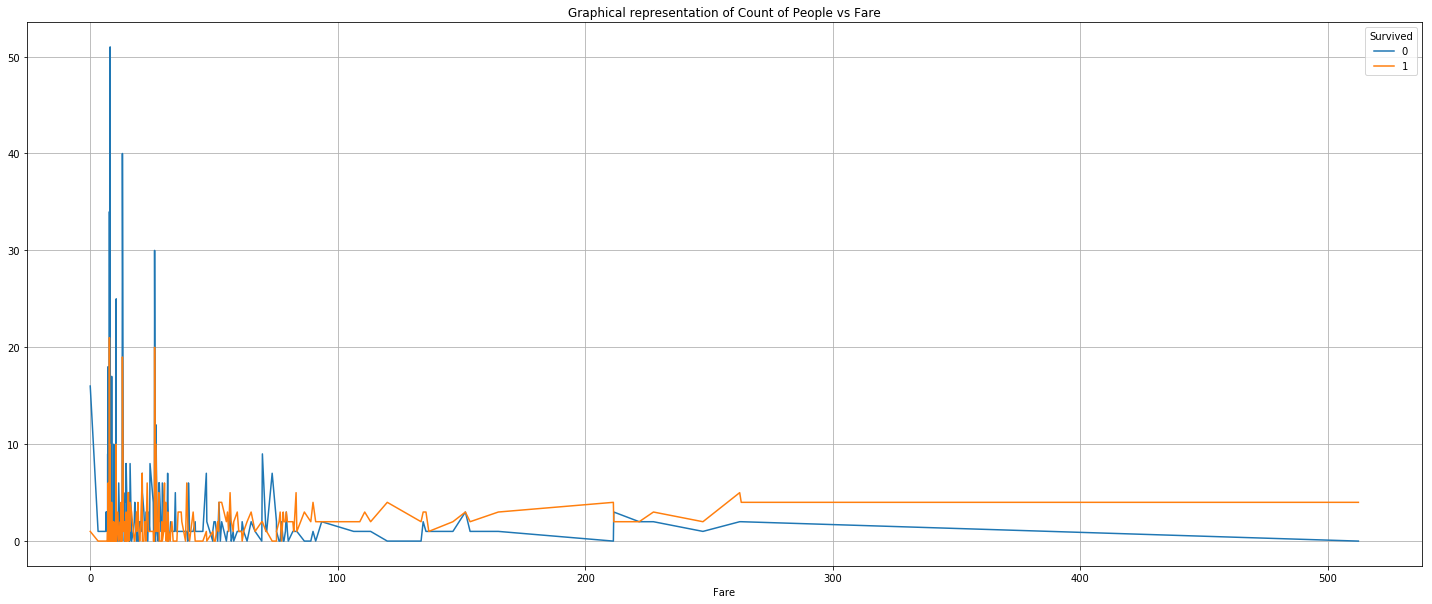

In [127]:
p1 = pc.plot(kind='line', figsize = (25,10), grid = True, 
             title = 'Graphical representation of Count of People vs Fare')

In [128]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [129]:
len(df['Cabin'].unique())

187

In [130]:
df['Cabin'].isnull().sum()

1014

In [131]:
print(cols)

['Pclass', 'Sex', 'Age', 'Total_Family_Members', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']


In [132]:
cols = cols[:6]+cols[7:]

In [133]:
print(cols)

['Pclass', 'Sex', 'Age', 'Total_Family_Members', 'Ticket', 'Fare', 'Embarked', 'Survived']


In [134]:
df = df[cols]
train = train[cols]
test = test[cols]

In [135]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [136]:
df.isnull().sum()

Pclass                    0
Sex                       0
Age                     263
Total_Family_Members      0
Ticket                    0
Fare                      1
Embarked                  2
Survived                  0
dtype: int64

In [137]:
pc = df.groupby(['Embarked','Survived'])['Survived'].count()

In [138]:
pc = pc.unstack()

In [139]:
pc

Survived,0,1
Embarked,,
C,137,133
Q,69,54
S,609,305


Text(0.5,1,'Embarked vs Survival')

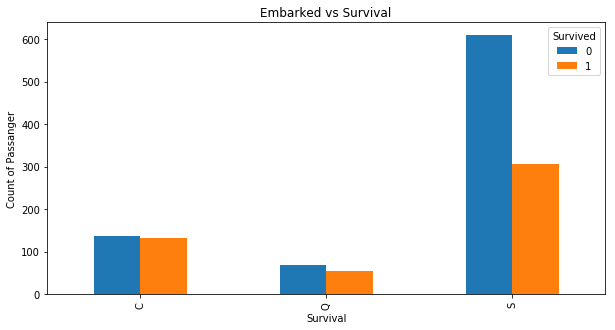

In [140]:
p1 = pc.plot.bar(figsize=(10,5), )
p1.set_xlabel('Survival')
p1.set_ylabel('Count of Passanger')
p1.set_title('Embarked vs Survival')

In [141]:
test.columns

Index(['Pclass', 'Sex', 'Age', 'Total_Family_Members', 'Ticket', 'Fare',
       'Embarked', 'Survived'],
      dtype='object')

### Summary till now - 

3 dataframes I have created mainly - df, train and test

df is basically the combination train and test. It was created to closely look all data together. We used df mainly for understanding the columns so that we can pick accurate columns for our analysis. I am giving the structure details below - 

Earlier df Structure - 
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch','Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']

Current df Structure - 
['Pclass', 'Sex', 'Age', 'Total_Family_Members', 'Ticket', 'Fare','Embarked', 'Survived']

Current Train Dataframe Structure - 
['Pclass', 'Sex', 'Age', 'Total_Family_Members', 'Ticket', 'Fare','Embarked', 'Survived']

Current Test Dataframe Structure - 
['Pclass', 'Sex', 'Age', 'Total_Family_Members', 'Ticket', 'Fare','Embarked', 'Survived']

As we have already filtered columns so now we can delete the df dataframe and stick with train and test dataframe only

Now we will move forward and separate our X_train, y_train, X_test, y_test - 

In [142]:
X_train = train[['Pclass', 'Sex', 'Age', 'Total_Family_Members', 'Ticket', 'Fare','Embarked']]
y_train = train['Survived']
X_test = test[['Pclass', 'Sex', 'Age', 'Total_Family_Members', 'Ticket', 'Fare','Embarked']]
y_test = test['Survived']

In [143]:
X_train.head()

,Pclass,Sex,Age,Total_Family_Members,Ticket,Fare,Embarked
0,3,male,22.0,2,1121171,7.2500,S
1,1,female,38.0,2,1121171,71.2833,C
2,3,female,26.0,1,1121171,7.9250,S
3,1,female,35.0,2,1121171,53.1000,S
4,3,male,35.0,1,1121171,8.0500,S


In [144]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [145]:
X_test.head()

,Pclass,Sex,Age,Total_Family_Members,Ticket,Fare,Embarked
0,3,male,34.5,1,14330911,7.8292,Q
1,3,female,47.0,2,14330911,7.0000,S
2,2,male,62.0,1,14330911,9.6875,Q
3,3,male,27.0,1,14330911,8.6625,S
4,3,female,22.0,3,14330911,12.2875,S


In [146]:
y_test.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [147]:
X_train.isnull().sum()

Pclass                    0
Sex                       0
Age                     177
Total_Family_Members      0
Ticket                    0
Fare                      0
Embarked                  2
dtype: int64

In [148]:
X_test.isnull().sum()

Pclass                   0
Sex                      0
Age                     86
Total_Family_Members     0
Ticket                   0
Fare                     1
Embarked                 0
dtype: int64

### Handlig NaN value
Plan - 
Age - Numeric column, so, I will replace NaN with mean
Embarked - String column, I am going to provide most common values there
Fare - Float column, I will apply mean there in one NaN value

In [150]:
from sklearn.base import TransformerMixin

In [151]:
class CustomImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [152]:
cup = CustomImputer()

In [153]:
X_train = cup.fit_transform(pd.DataFrame(X_train))

In [154]:
X_test = cup.fit_transform(pd.DataFrame(X_test))

In [155]:
X_train.isnull().sum()

Pclass                  0
Sex                     0
Age                     0
Total_Family_Members    0
Ticket                  0
Fare                    0
Embarked                0
dtype: int64

In [156]:
X_test.isnull().sum()

Pclass                  0
Sex                     0
Age                     0
Total_Family_Members    0
Ticket                  0
Fare                    0
Embarked                0
dtype: int64

In [157]:
X_train.head()

,Pclass,Sex,Age,Total_Family_Members,Ticket,Fare,Embarked
0,3,male,22.0,2,1121171,7.2500,S
1,1,female,38.0,2,1121171,71.2833,C
2,3,female,26.0,1,1121171,7.9250,S
3,1,female,35.0,2,1121171,53.1000,S
4,3,male,35.0,1,1121171,8.0500,S


In [158]:
X_test.head()

,Pclass,Sex,Age,Total_Family_Members,Ticket,Fare,Embarked
0,3,male,34.5,1,14330911,7.8292,Q
1,3,female,47.0,2,14330911,7.0000,S
2,2,male,62.0,1,14330911,9.6875,Q
3,3,male,27.0,1,14330911,8.6625,S
4,3,female,22.0,3,14330911,12.2875,S


### Encoding Categorical data

I will be using LabelEncoder to encode my string variables.. later I will be using OneHotEncoder to Encode

In [159]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [160]:
labelencoder = LabelEncoder()

In [161]:
X_train['Sex'] = labelencoder.fit_transform(X_train['Sex'])
X_train['Embarked'] = labelencoder.fit_transform(X_train['Embarked'])
X_test['Sex'] = labelencoder.fit_transform(X_test['Sex'])
X_test['Embarked'] = labelencoder.fit_transform(X_test['Embarked'])

In [162]:
X_train.head()

,Pclass,Sex,Age,Total_Family_Members,Ticket,Fare,Embarked
0,3,1,22.0,2,1121171,7.2500,2
1,1,0,38.0,2,1121171,71.2833,0
2,3,0,26.0,1,1121171,7.9250,2
3,1,0,35.0,2,1121171,53.1000,2
4,3,1,35.0,1,1121171,8.0500,2


In [163]:
X_test.head()

,Pclass,Sex,Age,Total_Family_Members,Ticket,Fare,Embarked
0,3,1,34.5,1,14330911,7.8292,1
1,3,0,47.0,2,14330911,7.0000,2
2,2,1,62.0,1,14330911,9.6875,1
3,3,1,27.0,1,14330911,8.6625,2
4,3,0,22.0,3,14330911,12.2875,2


### Creating Dummy variable

In [164]:
onehotencoder = OneHotEncoder(categorical_features = [1,6])

In [165]:
X_train = onehotencoder.fit_transform(X_train).toarray()
X_test = onehotencoder.fit_transform(X_test).toarray()

In [166]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,1.0,3.0,22.0,2.0,1121171.0,7.2500
1,1.0,0.0,1.0,0.0,0.0,1.0,38.0,2.0,1121171.0,71.2833
2,1.0,0.0,0.0,0.0,1.0,3.0,26.0,1.0,1121171.0,7.9250
3,1.0,0.0,0.0,0.0,1.0,1.0,35.0,2.0,1121171.0,53.1000
4,0.0,1.0,0.0,0.0,1.0,3.0,35.0,1.0,1121171.0,8.0500


In [167]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,1.0,0.0,3.0,34.5,1.0,14330911.0,7.8292
1,1.0,0.0,0.0,0.0,1.0,3.0,47.0,2.0,14330911.0,7.0000
2,0.0,1.0,0.0,1.0,0.0,2.0,62.0,1.0,14330911.0,9.6875
3,0.0,1.0,0.0,0.0,1.0,3.0,27.0,1.0,14330911.0,8.6625
4,1.0,0.0,0.0,0.0,1.0,3.0,22.0,3.0,14330911.0,12.2875


### Handling Dummy Variable Trap

To handle Dummy variable trap I am going to remove our 1st column.

In [168]:
X_train = X_train[:,1:]
X_test = X_test[:,1:]

In [169]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8
0,1.0,0.0,0.0,1.0,3.0,22.0,2.0,1121171.0,7.2500
1,0.0,1.0,0.0,0.0,1.0,38.0,2.0,1121171.0,71.2833
2,0.0,0.0,0.0,1.0,3.0,26.0,1.0,1121171.0,7.9250
3,0.0,0.0,0.0,1.0,1.0,35.0,2.0,1121171.0,53.1000
4,1.0,0.0,0.0,1.0,3.0,35.0,1.0,1121171.0,8.0500


In [170]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8
0,1.0,0.0,1.0,0.0,3.0,34.5,1.0,14330911.0,7.8292
1,0.0,0.0,0.0,1.0,3.0,47.0,2.0,14330911.0,7.0000
2,1.0,0.0,1.0,0.0,2.0,62.0,1.0,14330911.0,9.6875
3,1.0,0.0,0.0,1.0,3.0,27.0,1.0,14330911.0,8.6625
4,0.0,0.0,0.0,1.0,3.0,22.0,3.0,14330911.0,12.2875


### Feature Scaling
yes I am going to do feature scaling now..

In [383]:
from sklearn.preprocessing import StandardScaler

In [384]:
sc = StandardScaler()

In [385]:
X_train = sc.fit_transform(X_train)

In [386]:
X_test = sc.fit_transform(X_test)

In [387]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8
0,0.737695,-0.482043,-0.307562,0.615838,0.827377,-0.592481,0.059160,0.0,-0.502445
1,-1.355574,2.074505,-0.307562,-1.623803,-1.566107,0.638789,0.059160,0.0,0.786845
2,-1.355574,-0.482043,-0.307562,0.615838,0.827377,-0.284663,-0.560975,0.0,-0.488854
3,-1.355574,-0.482043,-0.307562,0.615838,-1.566107,0.407926,0.059160,0.0,0.420730
4,0.737695,-0.482043,-0.307562,0.615838,0.827377,0.407926,-0.560975,0.0,-0.486337


In [388]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8
0,0.755929,-0.568142,2.843757,-1.350676,0.873482,0.334993,-0.553443,0.0,-0.498407
1,-1.322876,-0.568142,-0.351647,0.740370,0.873482,1.325530,0.105643,0.0,-0.513274
2,0.755929,-0.568142,2.843757,-1.350676,-0.315819,2.514175,-0.553443,0.0,-0.465088
3,0.755929,-0.568142,-0.351647,0.740370,0.873482,-0.259330,-0.553443,0.0,-0.483466
4,-1.322876,-0.568142,-0.351647,0.740370,0.873482,-0.655545,0.764728,0.0,-0.418471


In [389]:
pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
0    891 non-null float64
1    891 non-null float64
2    891 non-null float64
3    891 non-null float64
4    891 non-null float64
5    891 non-null float64
6    891 non-null float64
7    891 non-null float64
8    891 non-null float64
dtypes: float64(9)
memory usage: 62.7 KB


In [390]:
pd.DataFrame(X_test).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
0    418 non-null float64
1    418 non-null float64
2    418 non-null float64
3    418 non-null float64
4    418 non-null float64
5    418 non-null float64
6    418 non-null float64
7    418 non-null float64
8    418 non-null float64
dtypes: float64(9)
memory usage: 29.5 KB


### Classification
### Finding problem is Linear or nonlinear ? Testing with Kernal SVM

I am using Kernal SVM here to test the problem is linear or non linear

In [451]:
from sklearn.svm import SVC

In [452]:
classifier = SVC(kernel = 'rbf', random_state = 0)

In [453]:
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [454]:
y_pred = classifier.predict(X_test)

In [455]:
from sklearn.metrics import confusion_matrix

In [456]:
cm = confusion_matrix(y_test, y_pred)

In [457]:
cm

array([[259,   7],
       [ 33, 119]], dtype=int64)

In [458]:
classifier.score(X_test,y_test)

0.9043062200956937

In [459]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score

In [460]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

In [461]:
accuracies

array([0.83333333, 0.8       , 0.7752809 , 0.87640449, 0.84269663,
       0.78651685, 0.83146067, 0.7752809 , 0.85393258, 0.80681818])

In [462]:
accuracies.mean()

0.818172454885938

In [463]:
accuracies.std()

0.0328910736668738

In [464]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [465]:
grid_search

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [466]:
best_accuracy

0.8249158249158249

In [467]:
best_parameters

{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}

### Running Kernal SVM with best values

In [470]:
bparameters = {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}

In [472]:
# Fitting Kernel SVM to the Training set
classifier = SVC(**bparameters)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [477]:
classifier.score(X_test,y_test)

0.8899521531100478

In [473]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

In [474]:
accuracies.mean()

0.8249773011008965

In [475]:
accuracies.std()

0.0341724035998206

### Decision Tree Classification

In [478]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier

In [479]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [480]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [481]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [482]:
classifier.score(X_test,y_test)

0.7488038277511961

In [483]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
#accuracies.mean()
#accuracies.std()

In [484]:
accuracies.mean()

0.7846280217909432

In [485]:
accuracies.std()

0.052880845366484415

### Random Forest

In [488]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier

In [489]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [490]:
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [491]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [492]:
classifier.score(X_test,y_test)

0.8397129186602871

In [421]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
#accuracies.mean()
#accuracies.std()

In [422]:
accuracies.mean()

0.7925175916468051

In [423]:
accuracies.std()

0.050805543287766465

In [ ]:
print(pd.DataFrame(X_train).columns)

### K-NN

In [494]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier

In [495]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [496]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [497]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [498]:
classifier.score(X_test,y_test)

0.8397129186602871

In [430]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

In [431]:
accuracies.mean()

0.8092075246850529

In [432]:
accuracies.std()

0.039183246316516165

### Naive_Bayes

In [500]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB

In [501]:
classifier = GaussianNB()

In [502]:
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [503]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [504]:
classifier.score(X_test,y_test)

0.8397129186602871

In [438]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

In [439]:
accuracies.mean()

0.7925680966973101

In [440]:
accuracies.std()

0.0360800692159391

### SVM

In [506]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [507]:
classifier.score(X_test,y_test)

1.0

In [508]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

In [509]:
accuracies.mean()

0.7866981613891727

In [510]:
accuracies.std()

0.027942239243488882

In [446]:
accuracies

array([0.81111111, 0.78888889, 0.7752809 , 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76136364])

### Submission

In [181]:
submission = pd.DataFrame({
    'PassengerId': test_sample['PassengerId'],
    'Survived': y_pred
})
submission.to_csv('submission.csv', index=False)

In [171]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier

In [172]:
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [173]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [174]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

In [175]:
cm = confusion_matrix(y_test, y_pred)

In [176]:
cm

array([[254,  12],
       [ 32, 120]], dtype=int64)

In [177]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score

In [182]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 50)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

In [183]:
accuracies.mean()

0.8322222222222223

In [184]:
accuracies.std()

0.08927877297368403

In [185]:
accuracies

array([0.83333333, 0.66666667, 0.83333333, 0.94444444, 0.77777778,
       0.83333333, 0.61111111, 0.83333333, 0.83333333, 0.94444444,
       0.77777778, 0.72222222, 0.88888889, 0.77777778, 0.66666667,
       0.83333333, 0.94444444, 0.83333333, 0.88888889, 0.88888889,
       0.94444444, 0.83333333, 0.88888889, 0.83333333, 0.88888889,
       0.83333333, 0.88888889, 0.83333333, 0.72222222, 1.        ,
       0.72222222, 0.83333333, 0.88888889, 0.88888889, 0.83333333,
       0.77777778, 0.66666667, 0.72222222, 0.88888889, 0.77777778,
       0.83333333, 0.77777778, 0.88235294, 0.94117647, 0.82352941,
       0.70588235, 0.88235294, 0.76470588, 1.        , 1.        ])